In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv('data/auckland_rain_temp_statsNZ.csv')
weather.head()

,date,rainfall(mm),tavg,tmax,tmin
0,1966-01-01,0.0,18.0,22.2,13.9
1,1966-01-02,26.2,20.5,23.9,17.1
2,1966-01-03,0.0,20.3,23.5,17.1
3,1966-01-04,0.0,20.3,24.4,16.2
4,1966-01-05,1.3,20.6,23.4,17.8


In [18]:
weather['rainfall(mm)'].max()

161.8

In [19]:
# israin coloum will change to categories as type, base on plants mood

weather['status'] = weather['rainfall(mm)'].map({'no': 0, 'yes': 1})
weather

,date,rainfall(mm),tavg,tmax,tmin,status
0,1966-01-01,0.0,18.0,22.2,13.9,NaN
1,1966-01-02,26.2,20.5,23.9,17.1,NaN
2,1966-01-03,0.0,20.3,23.5,17.1,NaN
3,1966-01-04,0.0,20.3,24.4,16.2,NaN
4,1966-01-05,1.3,20.6,23.4,17.8,NaN
...,...,...,...,...,...,...
20814,2022-12-27,0.0,21.0,25.1,17.0,NaN
20815,2022-12-28,0.0,22.4,26.7,18.1,NaN
20816,2022-12-29,0.0,21.8,25.1,18.6,NaN
20817,2022-12-30,0.0,21.6,24.0,19.1,NaN


In [20]:
weather.shape

(20819, 6)

In [21]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          20819 non-null  object 
 1   rainfall(mm)  20819 non-null  float64
 2   tavg          20819 non-null  float64
 3   tmax          20819 non-null  float64
 4   tmin          20819 non-null  float64
 5   status        0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 976.0+ KB


In [22]:
#Unique values in predictor column
weather['israin'].unique()

KeyError: 'israin'

In [ ]:
weather[weather['israin'].isnull()]

,date,rainfall(mm),tavg,tmax,tmin,rain,israin
0,1966-01-01,0.0,18.0,22.2,13.9,False,NaN
1,1966-01-02,26.2,20.5,23.9,17.1,True,NaN
2,1966-01-03,0.0,20.3,23.5,17.1,False,NaN
3,1966-01-04,0.0,20.3,24.4,16.2,False,NaN
4,1966-01-05,1.3,20.6,23.4,17.8,True,NaN
...,...,...,...,...,...,...,...
20814,2022-12-27,0.0,21.0,25.1,17.0,False,NaN
20815,2022-12-28,0.0,22.4,26.7,18.1,False,NaN
20816,2022-12-29,0.0,21.8,25.1,18.6,False,NaN
20817,2022-12-30,0.0,21.6,24.0,19.1,False,NaN


In [ ]:
weather['israin'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
weather['date'] = pd.to_datetime('2022-12-27')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20819 non-null  datetime64[ns]
 1   rainfall(mm)  20819 non-null  float64       
 2   tavg          20819 non-null  float64       
 3   tmax          20819 non-null  float64       
 4   tmin          20819 non-null  float64       
 5   rain          20819 non-null  bool          
 6   israin        0 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(5)
memory usage: 996.3 KB


In [ ]:
weather=weather.drop('date',axis=1)


<Axes: >

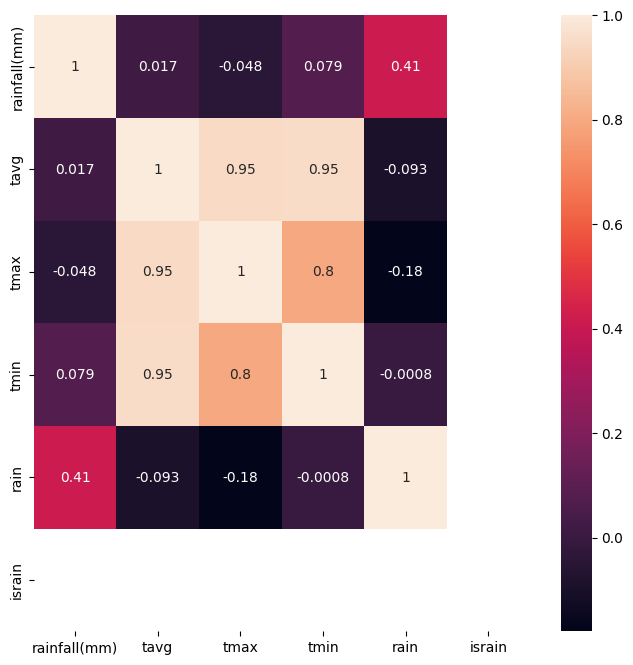

In [ ]:
#Heatmap for correlation between variables
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(weather.corr(),annot=True)

#TMIN and TMAX are highly positively correlated to each other as observed from above correlation matrix.

In [ ]:
#Splitting dependent and independent variables
y=weather.pop('israin')
X=weather

In [ ]:
#Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Default Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [ ]:
#Fitting train data into model
clf.fit(X_train,y_train)

ValueError: Input y contains NaN.

In [ ]:
#Prediction on test data
pred=clf.predict(X_test)

In [ ]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[3108    0]
 [   0 3138]]


In [ ]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3108
        True       1.00      1.00      1.00      3138

    accuracy                           1.00      6246
   macro avg       1.00      1.00      1.00      6246
weighted avg       1.00      1.00      1.00      6246



In [ ]:
#Feature Importance
clf.feature_importances_

array([0.5059247 , 0.00229308, 0.00799729, 0.00152762, 0.48225731])